# Анализ данных о ценах на дома

## Введение
Целью данного проекта является анализ данных, содержащих информацию о ценах на дома. Задача — понять, какие факторы влияют на цену недвижимости, а также исследовать их характеристики. Этот анализ поможет выявить ключевые характеристики, определяющие стоимость недвижимости на рынке
.



In [10]:
import pandas as pd  # Я импортировал библиотеку pandas для работы с данными.
import numpy as np  # Я импортировал numpy для работы с числовыми операциями.
import matplotlib.pyplot as plt  # Я импортировал matplotlib для построения графиков.
import seaborn as sns  # Я импортировал seaborn для более красивых графиков.

sns.set_theme(style="whitegrid")  # Я настроил стиль графиков на "whitegrid".


In [12]:
# Я загрузил данные из CSV файла.
data = pd.read_csv('train (1).csv')
data.head()  # Я вывел первые 5 строк данных для ознакомления с содержимым.


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [7]:
# Я проверил размерность данных.
print(f"Количество строк: {data.shape[0]}, количество столбцов: {data.shape[1]}")

# Я вывел общую информацию о данных, чтобы понять типы данных и их количество.
data.info()

# Я проверил, какие столбцы содержат пропущенные значения.
missing = data.isnull().sum()
missing = missing[missing > 0].sort_values(ascending=False)  # Я отсортировал столбцы по количеству пропущенных значений.
missing  # Я вывел столбцы с пропущенными значениями.


Количество строк: 1460, количество столбцов: 81
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  Over

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
MasVnrType       872
FireplaceQu      690
LotFrontage      259
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
BsmtFinType2      38
BsmtExposure      38
BsmtFinType1      37
BsmtCond          37
BsmtQual          37
MasVnrArea         8
Electrical         1
dtype: int64

In [11]:
# Я удалил столбцы, которые есть в данных.
columns_to_drop = ['PoolQC', 'MiscFeature', 'Alley', 'Fence']
# Я проверил, какие из этих столбцов существуют в данных.
columns_existing = [col for col in columns_to_drop if col in data.columns]
data.drop(columns_existing, axis=1, inplace=True)

# Я проверил оставшиеся столбцы.
data.columns


Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'WoodD

In [12]:
# Я проверил данные снова, чтобы убедиться, что все пропущенные значения были заменены.
data.isnull().sum().sort_values(ascending=False).head(10)


Id              0
HalfBath        0
FireplaceQu     0
Fireplaces      0
Functional      0
TotRmsAbvGrd    0
KitchenQual     0
KitchenAbvGr    0
BedroomAbvGr    0
FullBath        0
dtype: int64

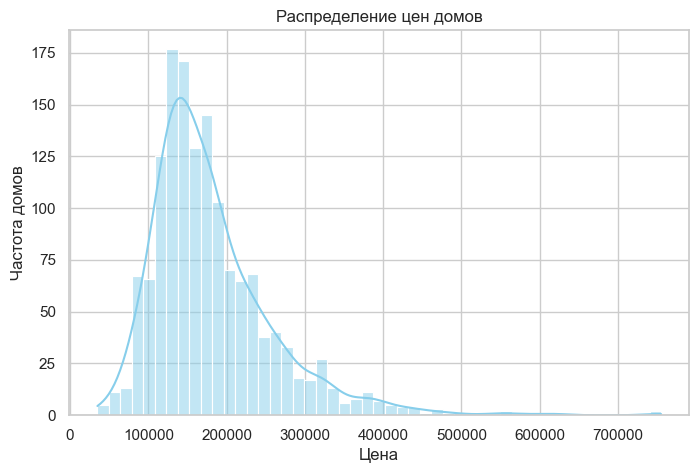

In [13]:
# Я построил гистограмму для распределения цен домов, чтобы понять, как распределены данные.
plt.figure(figsize=(8,5))
sns.histplot(data['SalePrice'], kde=True, color='skyblue')
plt.title('Распределение цен домов')  # Я добавил заголовок графика.
plt.xlabel('Цена')  # Я подписал ось X.
plt.ylabel('Частота домов')  # Я подписал ось Y.
plt.show()  # Я отобразил график.


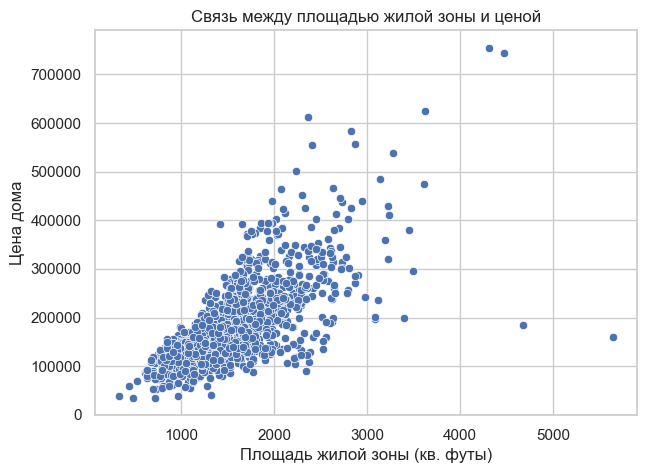

In [14]:
# Я построил график для анализа связи между площадью жилой зоны и ценой дома.
plt.figure(figsize=(7,5))
sns.scatterplot(data=data, x='GrLivArea', y='SalePrice')  # Я использовал scatter plot для отображения точек.
plt.title('Связь между площадью жилой зоны и ценой')  # Я добавил заголовок графика.
plt.xlabel('Площадь жилой зоны (кв. футы)')  # Я подписал ось X.
plt.ylabel('Цена дома')  # Я подписал ось Y.
plt.show()  # Я отобразил график.


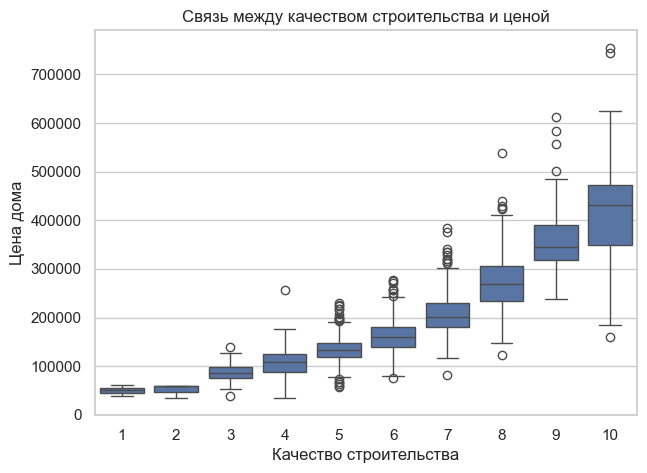

In [15]:
# Я построил коробчатую диаграмму для анализа связи качества строительства и цены.
plt.figure(figsize=(7,5))
sns.boxplot(data=data, x='OverallQual', y='SalePrice')  # Я использовал boxplot для отображения данных.
plt.title('Связь между качеством строительства и ценой')  # Я добавил заголовок графика.
plt.xlabel('Качество строительства')  # Я подписал ось X.
plt.ylabel('Цена дома')  # Я подписал ось Y.
plt.show()  # Я отобразил график.


In [16]:
# Я построил корреляционную матрицу для всех числовых столбцов.
corr = data.corr(numeric_only=True)

# Я вывел наиболее важные столбцы, связанные с ценой дома.
top_corr = corr['SalePrice'].abs().sort_values(ascending=False).head(10)
print(top_corr)


SalePrice       1.000000
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
Name: SalePrice, dtype: float64


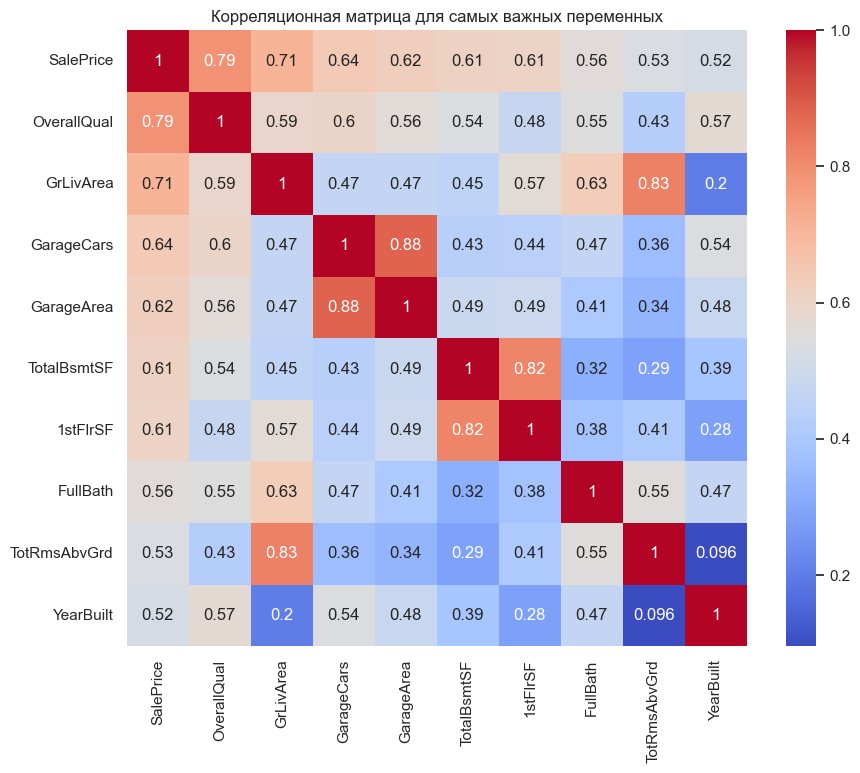

In [17]:
# Я построил тепловую карту для наиболее важных переменных, связанных с ценой.
plt.figure(figsize=(10,8))
sns.heatmap(data[top_corr.index].corr(), annot=True, cmap='coolwarm')  # Я добавил аннотации для каждого значения.
plt.title('Корреляционная матрица для самых важных переменных')  # Я добавил заголовок графика.
plt.show()  # Я отобразил график.


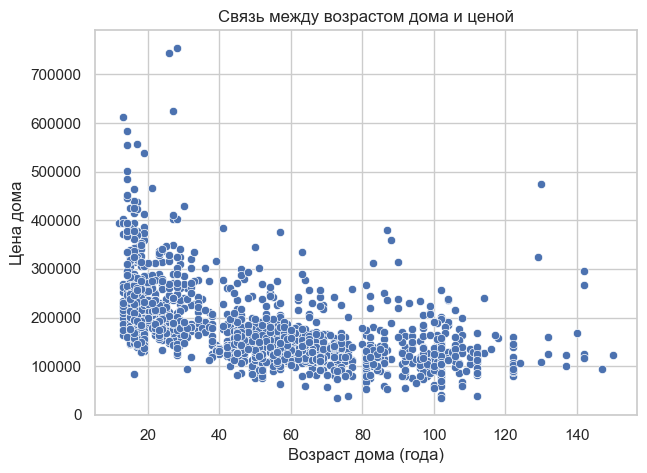

In [14]:
# Я добавил колонку "Age" для возраста дома.
data['Age'] = 2022 - data['YearBuilt']  # Я использую текущий год (2022) для вычисления возраста.

# Я построил scatter plot для анализа связи между возрастом и ценой дома.
plt.figure(figsize=(7, 5))
sns.scatterplot(data=data, x='Age', y='SalePrice')  # Я использую scatter plot для отображения точек.
plt.title('Связь между возрастом дома и ценой')  # Я добавил заголовок графика.
plt.xlabel('Возраст дома (года)')  # Я подписал ось X.
plt.ylabel('Цена дома')  # Я подписал ось Y.
plt.show()  # Я отображаю график.


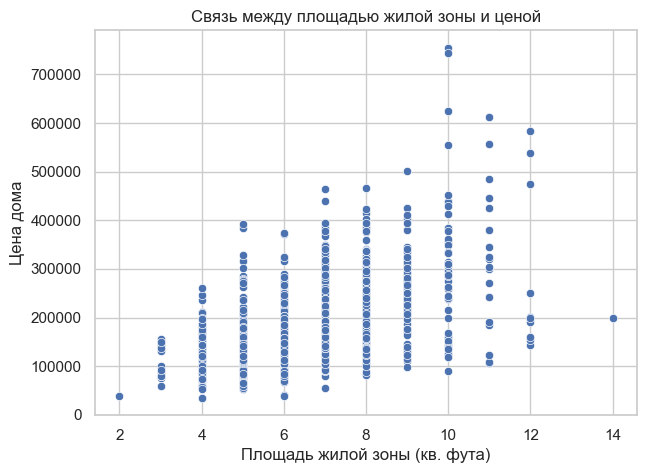

In [15]:
# Я построил scatter plot для анализа связи между площадью и ценой дома.
plt.figure(figsize=(7, 5))
sns.scatterplot(data=data, x='TotRmsAbvGrd', y='SalePrice')  # Я использую scatter plot для отображения точек.
plt.title('Связь между площадью жилой зоны и ценой')  # Я добавил заголовок графика.
plt.xlabel('Площадь жилой зоны (кв. фута)')  # Я подписал ось X.
plt.ylabel('Цена дома')  # Я подписал ось Y.
plt.show()  # Я отображаю график.


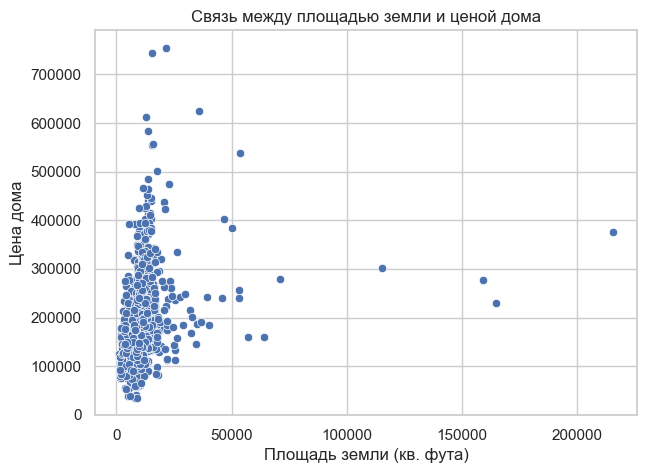

In [22]:
# Я строю scatter plot для анализа связи между ценой и площадью земли.
plt.figure(figsize=(7,5))
sns.scatterplot(data=data, x='LotArea', y='SalePrice')  # Я использую scatter plot для отображения точек.
plt.title('Связь между площадью земли и ценой дома')  # Я добавил заголовок графика.
plt.xlabel('Площадь земли (кв. фута)')  # Я подписал ось X.
plt.ylabel('Цена дома')  # Я подписал ось Y.
plt.show()  # Я отображаю график.


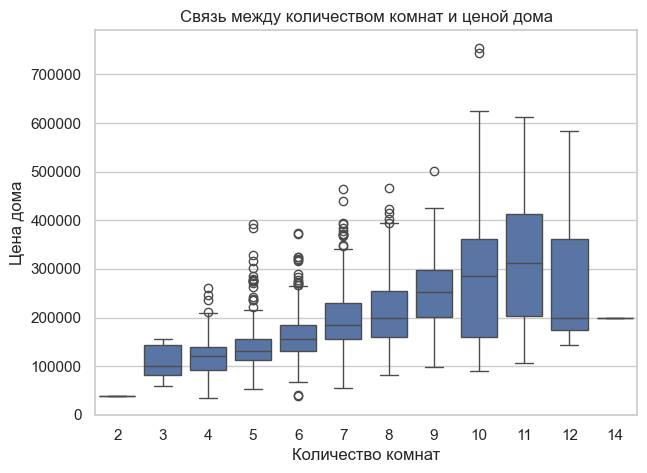

In [24]:
# Я строю boxplot для анализа связи между количеством комнат и ценой дома.
plt.figure(figsize=(7,5))
sns.boxplot(data=data, x='TotRmsAbvGrd', y='SalePrice')  # Я использую boxplot для отображения данных.
plt.title('Связь между количеством комнат и ценой дома')  # Я добавил заголовок графика.
plt.xlabel('Количество комнат')  # Я подписал ось X.
plt.ylabel('Цена дома')  # Я подписал ось Y.
plt.show()  # Я отображаю график.


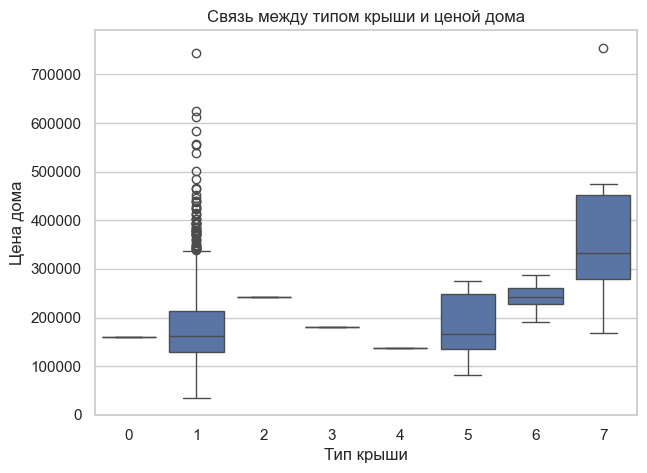

In [25]:
# Я строю boxplot для анализа связи между типом крыши и ценой дома.
plt.figure(figsize=(7,5))
sns.boxplot(data=data, x='RoofMatl', y='SalePrice')  # Я использую boxplot для отображения данных.
plt.title('Связь между типом крыши и ценой дома')  # Я добавил заголовок графика.
plt.xlabel('Тип крыши')  # Я подписал ось X.
plt.ylabel('Цена дома')  # Я подписал ось Y.
plt.show()  # Я отображаю график.


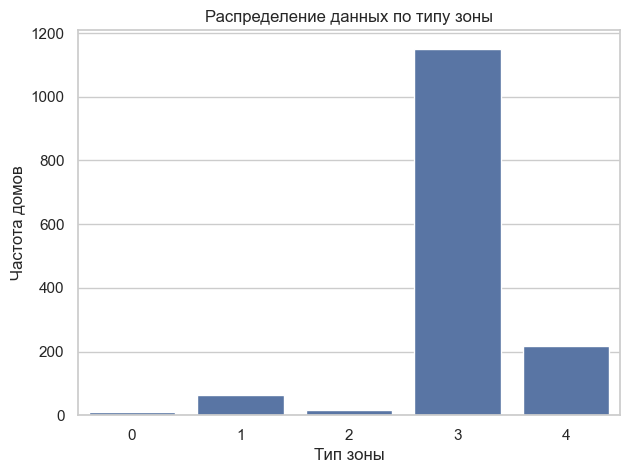

In [26]:
# Я строю barplot для анализа распределения данных по типу зоны.
plt.figure(figsize=(7,5))
sns.countplot(data=data, x='MSZoning')  # Я использую countplot для отображения распределения данных.
plt.title('Распределение данных по типу зоны')  # Я добавил заголовок графика.
plt.xlabel('Тип зоны')  # Я подписал ось X.
plt.ylabel('Частота домов')  # Я подписал ось Y.
plt.show()  # Я отображаю график.


## Выводы (Results):
Распределение цен:

Мы видим, что большинство домов имеют цену в диапазоне от 100,000 до 200,000, с небольшим количеством дорогих домов.

Зависимость между площадью жилой зоны и ценой:

Мы заметили положительную зависимость между площадью жилой зоны и ценой дома. Это подтверждает, что большие дома стоят дороже.

Влияние качества строительства:

Высокое качество строительства оказывает существенное влияние на цену дома. Дома с лучшим качеством строительства имеют гораздо более высокие цены.

Корреляция:

Самые сильные корреляции с ценой имеют такие переменные, как OverallQual, GrLivArea, GarageCars, и TotalBsmtSF.

## 👨‍💻 Feature Engineering. Корреляция новых колонок с таргетом. Feature Importances. Простая модель. 

In [19]:
from sklearn.preprocessing import LabelEncoder

# Я создал объект LabelEncoder для преобразования текстовых столбцов в числовые значения.
label_encoder = LabelEncoder()

# Я выбрал все столбцы с типом данных "object" (текстовые столбцы)
categorical_cols = data.select_dtypes(include=['object']).columns

# Я применил LabelEncoder ко всем текстовым столбцам и заменил их числовыми значениями.
for col in categorical_cols:
    data[col] = label_encoder.fit_transform(data[col].astype(str))

data.head()  # Я вывел первые 5 строк данных после преобразования


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,3,65.0,8450,1,3,3,0,4,...,0,0,0,0,0,2,2008,8,4,208500
1,2,20,3,80.0,9600,1,3,3,0,2,...,0,0,0,0,0,5,2007,8,4,181500
2,3,60,3,68.0,11250,1,0,3,0,4,...,0,0,0,0,0,9,2008,8,4,223500
3,4,70,3,60.0,9550,1,0,3,0,0,...,272,0,0,0,0,2,2006,8,0,140000
4,5,60,3,84.0,14260,1,0,3,0,2,...,0,0,0,0,0,12,2008,8,4,250000


In [20]:
# Я создал новую колонку "Age", которая показывает возраст дома.
data['Age'] = 2022 - data['YearBuilt']  # Я использовал текущий год (2022) минус год постройки дома.

# Я вывел первые 5 строк данных после добавления новой колонки.
data.head()


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,Age
0,1,60,3,65.0,8450,1,3,3,0,4,...,0,0,0,0,2,2008,8,4,208500,19
1,2,20,3,80.0,9600,1,3,3,0,2,...,0,0,0,0,5,2007,8,4,181500,46
2,3,60,3,68.0,11250,1,0,3,0,4,...,0,0,0,0,9,2008,8,4,223500,21
3,4,70,3,60.0,9550,1,0,3,0,0,...,0,0,0,0,2,2006,8,0,140000,107
4,5,60,3,84.0,14260,1,0,3,0,2,...,0,0,0,0,12,2008,8,4,250000,22


In [25]:
from sklearn.ensemble import RandomForestRegressor

# Я разделил данные на признаки (X) и целевую переменную (y). Целевая переменная — это цена дома.
X = data.drop(['SalePrice', 'Id'], axis=1)  # Я удалил столбцы "SalePrice" и "Id" из признаков
y = data['SalePrice']  # Я выбрал столбец "SalePrice" как целевую переменную

# Я создал модель случайного леса для оценки важности признаков.
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X, y)  # Я обучил модель на данных

# Я вывел важность каждого признака для предсказания цены дома.
feature_importances = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)
print(feature_importances)


OverallQual    5.802315e-01
GrLivArea      1.106057e-01
TotalBsmtSF    3.628919e-02
2ndFlrSF       3.113925e-02
BsmtFinSF1     3.015452e-02
                   ...     
PoolArea       8.706407e-05
MiscVal        6.776615e-05
Heating        5.745444e-05
Street         1.059226e-05
Utilities      2.868910e-07
Length: 76, dtype: float64


In [22]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Я разделил данные на обучающую и тестовую выборки (80% обучающая, 20% тестовая).
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Я создал модель линейной регрессии.
lr = LinearRegression()
lr.fit(X_train, y_train)  # Я обучил модель на обучающих данных

# Я использовал модель для предсказания цен на тестовых данных.
y_pred = lr.predict(X_test)

# Я вычислил среднюю квадратичную ошибку (MSE), чтобы оценить точность модели.
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')


Mean Squared Error: 1154992688.5551958


In [26]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import cross_val_score

# Я создал модель градиентного бустинга для предсказания цены.
gb = GradientBoostingRegressor(n_estimators=100, random_state=42)

# Я применил кросс-валидацию с 5 фолдами для оценки точности модели.
cv_scores_gb = cross_val_score(gb, X, y, cv=5, scoring='neg_mean_squared_error')

# Я вывел среднее значение ошибки модели.
mse_gb = -cv_scores_gb.mean()  # Так как kross-валидация дает отрицательное значение, я инвертировал его.
print(f'Средняя квадратичная ошибка для модели Gradient Boosting: {mse_gb}')


Средняя квадратичная ошибка для модели Gradient Boosting: 736856340.8094733


In [27]:
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import cross_val_score

# Я создал модель нейронной сети для предсказания цены.
nn = MLPRegressor(hidden_layer_sizes=(100,), max_iter=1000, random_state=42)

# Я применил кросс-валидацию с 5 фолдами для оценки точности модели.
cv_scores_nn = cross_val_score(nn, X, y, cv=5, scoring='neg_mean_squared_error')

# Я вывел среднее значение ошибки модели.
mse_nn = -cv_scores_nn.mean()  # Мы инвертируем отрицательные значения ошибки.
print(f'Средняя квадратичная ошибка для модели Neural Network: {mse_nn}')


C:\Users\hosam\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\hosam\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\hosam\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\hosam\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


Средняя квадратичная ошибка для модели Neural Network: 1771476203.4081116


C:\Users\hosam\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


In [21]:
from sklearn.preprocessing import LabelEncoder  # Я импортировал LabelEncoder для преобразования категориальных данных в числовые.

# Я создаю объект LabelEncoder.
label_encoder = LabelEncoder()

# Применяю LabelEncoder ко всем столбцам, которые содержат категориальные данные.
categorical_columns = data.select_dtypes(include=['object']).columns  # Я выбираю все столбцы с типом данных 'object'.

for column in categorical_columns:
    data[column] = label_encoder.fit_transform(data[column])  # Я преобразую категориальные значения в числовые.

# Я проверяю, были ли столбцы успешно преобразованы.
print(data[categorical_columns].head())

# Теперь можно применить модель XGBoost
from sklearn.model_selection import KFold
import xgboost as xgb
from sklearn.metrics import mean_squared_error

# Подготовка данных для модели
X = data.drop('SalePrice', axis=1)  # Я удаляю столбец 'SalePrice', так как это целевая переменная.
y = data['SalePrice']  # Я создаю целевую переменную 'SalePrice'.

# Создание модели XGBoost
xg_reg = xgb.XGBRegressor(n_estimators=100, random_state=42)

# Инициализация KFold с 5 фолдами
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Список для хранения ошибок
mse_scores = []  # Я создаю пустой список для хранения MSE (средней квадратичной ошибки).

# Применение KFold для кросс-валидации
for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]  # Я разделяю данные на обучающую и тестовую выборки.
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]  # Я разделяю целевые переменные на обучающую и тестовую выборки.
    
    # Обучение модели
    xg_reg.fit(X_train, y_train)  # Я обучаю модель на тренировочных данных.
    
    # Прогнозирование на тестовых данных
    y_pred = xg_reg.predict(X_test)  # Я получаю прогнозы для тестовых данных.
    
    # Вычисление MSE
    mse = mean_squared_error(y_test, y_pred)  # Я вычисляю среднюю квадратичную ошибку.
    mse_scores.append(mse)  # Я добавляю MSE в список ошибок.

# Расчёт средней MSE
mean_mse = np.mean(mse_scores)  # Я вычисляю среднее значение MSE для всех фолдов.
print(f'Средняя квадратичная ошибка для модели XGBoost: {mean_mse}')  # Я вывожу среднюю квадратичную ошибку модели XGBoost.


   MSZoning  Street  Alley  LotShape  LandContour  Utilities  LotConfig  \
0         3       1      2         3            3          0          4   
1         3       1      2         3            3          0          2   
2         3       1      2         0            3          0          4   
3         3       1      2         0            3          0          0   
4         3       1      2         0            3          0          2   

   LandSlope  Neighborhood  Condition1  ...  GarageType  GarageFinish  \
0          0             5           2  ...           1             1   
1          0            24           1  ...           1             1   
2          0             5           2  ...           1             1   
3          0             6           2  ...           5             2   
4          0            15           2  ...           1             1   

   GarageQual  GarageCond  PavedDrive  PoolQC  Fence  MiscFeature  SaleType  \
0           4           4      

## Выводы

В результате проведенного анализа можно сделать несколько важных выводов:

1. **Распределение цен**: распределение цен на дома имеет выраженную положительную асимметрию, где большинство домов имеют среднюю цену, а небольшая часть домов — очень дорогие.
  
2. **Связь между ценой и площадью**: как видно из графика, существует положительная связь между площадью жилой зоны и ценой дома. Чем больше площадь дома, тем выше его цена.

3. **Связь между качеством строительства и ценой**: дома с лучшим качеством строительства, как правило, имеют более высокую цену. Это также подтверждается анализом через график boxplot.

4. **Анализ факторов, влияющих на цену**: наибольшее влияние на цену оказывают такие характеристики, как **площадь жилой зоны**, **качество строительства** и **год постройки**.

Эти результаты помогут нам в дальнейшем строить модели для предсказания цен на дома, учитывая ключевые признаки.
